In [33]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import datetime as dt
import math
from fbprophet import Prophet as pp

data = pd.read_csv('https://raw.githubusercontent.com/sahdan96/covid19/main/covid_death.csv')
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

teen = data[['date', 'Teenager']]
teen = teen.rename(columns = {"date":"ds","Teenager":"y"})

adult = data[['date', 'Adult']]
adult = adult.rename(columns = {"date":"ds","Adult":"y"})

old = data[['date', 'Old']]
old = old.rename(columns = {"date":"ds","Old":"y"})

total = data[['date', 'total_death']]
total = total.rename(columns = {"date":"ds","total_death":"y"})


def predict(age):
  df = age[:-3]
  future = age[-3:]

  train_len = math.ceil(len(df))
  train = df[:train_len]
  test = df[train_len:]

  m = pp(daily_seasonality=True)
  m.fit(train)

  future = m.make_future_dataframe(periods=200)
  prediction = m.predict(future)
  return prediction, df

In [34]:
def y_axis(prediction, df):
  y_pred = prediction['yhat'].values
  y_true = df['y'].values
  return y_pred, y_true

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

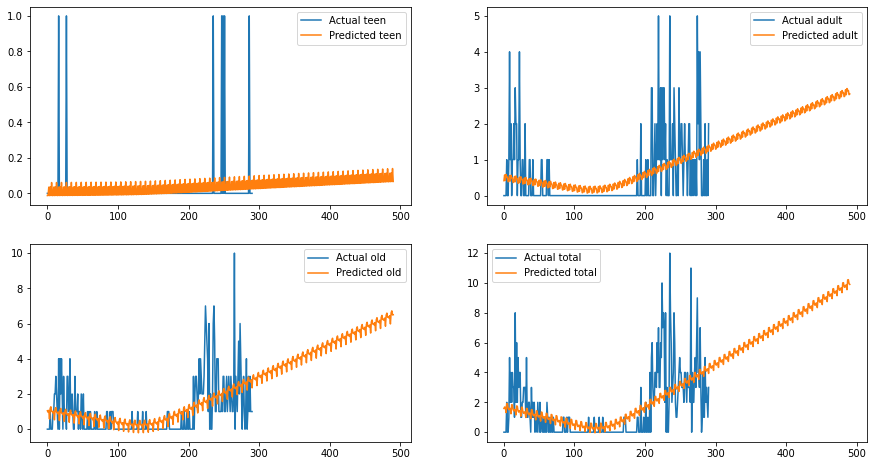

In [35]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.plot(y_axis(predict(teen)[0], predict(teen)[1])[1], label='Actual teen')
plt.plot(y_axis(predict(teen)[0], predict(teen)[1])[0], label='Predicted teen')
plt.legend()

plt.subplot(2,2,2)
plt.plot(y_axis(predict(adult)[0], predict(adult)[1])[1], label='Actual adult')
plt.plot(y_axis(predict(adult)[0], predict(adult)[1])[0], label='Predicted adult')
plt.legend()

plt.subplot(2,2,3)
plt.plot(y_axis(predict(old)[0], predict(old)[1])[1], label='Actual old')
plt.plot(y_axis(predict(old)[0], predict(old)[1])[0], label='Predicted old')
plt.legend()

plt.subplot(2,2,4)
plt.plot(y_axis(predict(total)[0], predict(total)[1])[1], label='Actual total')
plt.plot(y_axis(predict(total)[0], predict(total)[1])[0], label='Predicted total')
plt.legend()

plt.show()